In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

tf.random.set_seed(42)


import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


2024-11-11 14:54:05.591494: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-11 14:54:05.669455: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-11 14:54:05.691398: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-11 14:54:05.832768: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-11 14:54:07.153400: W tensorflow/compiler/tf2

In [3]:
dataset = pd.read_csv("ifood_df.csv", sep=",", encoding='latin1')
dataset.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [4]:
print(dataset.dtypes)
print(dataset.describe())
dataset.isnull().sum()
dataset.duplicated().sum()
dataset.columns

Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             int64
educatio

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [5]:
for col in dataset.columns:
    unique_values = dataset[col].unique()
    print(f"Column '{col}' has {len(unique_values)} unique values")

Column 'Income' has 1963 unique values
Column 'Kidhome' has 3 unique values
Column 'Teenhome' has 3 unique values
Column 'Recency' has 100 unique values
Column 'MntWines' has 775 unique values
Column 'MntFruits' has 158 unique values
Column 'MntMeatProducts' has 551 unique values
Column 'MntFishProducts' has 182 unique values
Column 'MntSweetProducts' has 176 unique values
Column 'MntGoldProds' has 212 unique values
Column 'NumDealsPurchases' has 15 unique values
Column 'NumWebPurchases' has 15 unique values
Column 'NumCatalogPurchases' has 13 unique values
Column 'NumStorePurchases' has 14 unique values
Column 'NumWebVisitsMonth' has 16 unique values
Column 'AcceptedCmp3' has 2 unique values
Column 'AcceptedCmp4' has 2 unique values
Column 'AcceptedCmp5' has 2 unique values
Column 'AcceptedCmp1' has 2 unique values
Column 'AcceptedCmp2' has 2 unique values
Column 'Complain' has 2 unique values
Column 'Z_CostContact' has 1 unique values
Column 'Z_Revenue' has 1 unique values
Column 'Re

In [ ]:
#dataset = dataset.drop(columns=['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID'], axis=1).reset_index(drop=True)


In [6]:
for col in dataset.columns:
    if dataset[col].dtype in ['float64', 'int64']:
        unique_values = dataset[col].unique()
        print(f"Column '{col}' has {len(unique_values)} unique values")

Column 'Income' has 1963 unique values
Column 'Kidhome' has 3 unique values
Column 'Teenhome' has 3 unique values
Column 'Recency' has 100 unique values
Column 'MntWines' has 775 unique values
Column 'MntFruits' has 158 unique values
Column 'MntMeatProducts' has 551 unique values
Column 'MntFishProducts' has 182 unique values
Column 'MntSweetProducts' has 176 unique values
Column 'MntGoldProds' has 212 unique values
Column 'NumDealsPurchases' has 15 unique values
Column 'NumWebPurchases' has 15 unique values
Column 'NumCatalogPurchases' has 13 unique values
Column 'NumStorePurchases' has 14 unique values
Column 'NumWebVisitsMonth' has 16 unique values
Column 'AcceptedCmp3' has 2 unique values
Column 'AcceptedCmp4' has 2 unique values
Column 'AcceptedCmp5' has 2 unique values
Column 'AcceptedCmp1' has 2 unique values
Column 'AcceptedCmp2' has 2 unique values
Column 'Complain' has 2 unique values
Column 'Z_CostContact' has 1 unique values
Column 'Z_Revenue' has 1 unique values
Column 'Re

In [7]:
for col in dataset.columns:
    if col.startswith("Mnt") or col == "Income":
        print(col)

        #Calculate Q1, Q3, and IQR for the numerical columns
        Q1 = dataset[col].quantile(0.25)
        Q3 = dataset[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the DataFrame to remove outliers
        df_no_outliers = dataset[~((dataset[col] < lower_bound) | (dataset[col] > upper_bound))].copy()

df_no_outliers

Income
MntWines
MntFruits
MntMeatProducts
MntFishProducts
MntSweetProducts
MntGoldProds
MntTotal
MntRegularProds


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


<class 'pandas.core.frame.DataFrame'>
Index: 2201 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2201 non-null   float64
 1   Kidhome               2201 non-null   int64  
 2   Teenhome              2201 non-null   int64  
 3   Recency               2201 non-null   int64  
 4   MntWines              2201 non-null   int64  
 5   MntFruits             2201 non-null   int64  
 6   MntMeatProducts       2201 non-null   int64  
 7   MntFishProducts       2201 non-null   int64  
 8   MntSweetProducts      2201 non-null   int64  
 9   MntGoldProds          2201 non-null   int64  
 10  NumDealsPurchases     2201 non-null   int64  
 11  NumWebPurchases       2201 non-null   int64  
 12  NumCatalogPurchases   2201 non-null   int64  
 13  NumStorePurchases     2201 non-null   int64  
 14  NumWebVisitsMonth     2201 non-null   int64  
 15  AcceptedCmp3          2201

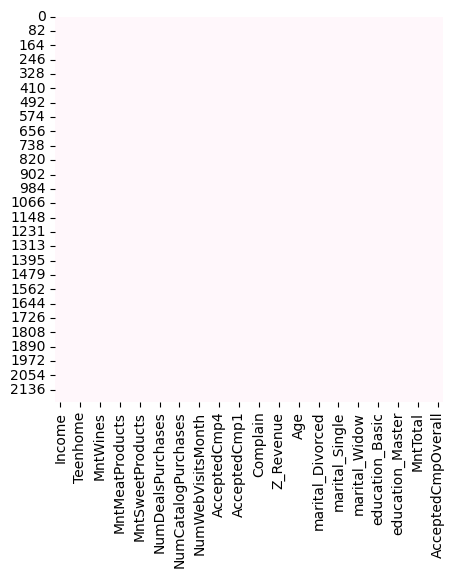

In [8]:
df_no_outliers.describe()
df_no_outliers.info()
plt.figure(figsize=(5,5))
sns.heatmap(df_no_outliers.isnull(), cbar=False, cmap='PuBu')
plt.show()

In [9]:
categorical, contin=[],[]

for i in df_no_outliers.columns:
    
    if df_no_outliers[i].dtype == 'object':
        categorical.append(i)
    else:
        contin.append(i)
        
print(categorical)
print(contin)

[]
['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall']


In [10]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2201 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2201 non-null   float64
 1   Kidhome               2201 non-null   int64  
 2   Teenhome              2201 non-null   int64  
 3   Recency               2201 non-null   int64  
 4   MntWines              2201 non-null   int64  
 5   MntFruits             2201 non-null   int64  
 6   MntMeatProducts       2201 non-null   int64  
 7   MntFishProducts       2201 non-null   int64  
 8   MntSweetProducts      2201 non-null   int64  
 9   MntGoldProds          2201 non-null   int64  
 10  NumDealsPurchases     2201 non-null   int64  
 11  NumWebPurchases       2201 non-null   int64  
 12  NumCatalogPurchases   2201 non-null   int64  
 13  NumStorePurchases     2201 non-null   int64  
 14  NumWebVisitsMonth     2201 non-null   int64  
 15  AcceptedCmp3          2201

## Correlation Analysis

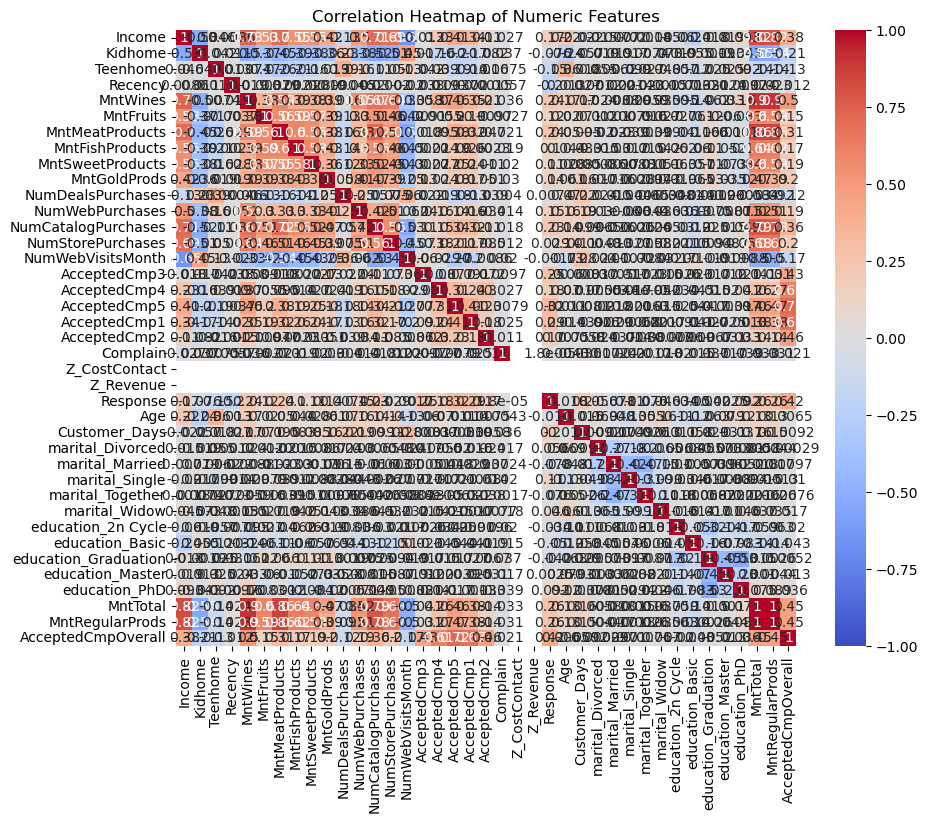

In [11]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_no_outliers[contin].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

## Encode Categorical Variables

In [12]:
df_no_outliers[contin] = StandardScaler().fit_transform(df_no_outliers[contin])
dataset_original = dataset.copy()
dataset_original[contin] = StandardScaler().fit_transform(dataset_original[contin])

In [13]:
df_no_outliers

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,0.318826,-0.824661,-0.932346,0.309779,0.985185,1.560569,1.768357,2.451089,1.493793,0.850006,...,-0.589068,-0.189116,-0.314407,-0.158592,0.990504,-0.443673,-0.525302,1.698405,1.686902,-0.438415
1,-0.252040,1.036959,0.904802,-0.381410,-0.874932,-0.637525,-0.731929,-0.650520,-0.634178,-0.734620,...,-0.589068,-0.189116,-0.314407,-0.158592,0.990504,-0.443673,-0.525302,-0.943096,-0.911941,-0.438415
2,0.971058,-0.824661,-0.932346,-0.796123,0.362165,0.575217,-0.171680,1.338159,-0.144990,-0.038930,...,1.697597,-0.189116,-0.314407,-0.158592,0.990504,-0.443673,-0.525302,0.305837,0.321872,-0.438415
3,-1.205484,1.036959,-0.932346,-0.796123,-0.874932,-0.561729,-0.667107,-0.504562,-0.585260,-0.753945,...,1.697597,-0.189116,-0.314407,-0.158592,0.990504,-0.443673,-0.525302,-0.895801,-0.860911,-0.438415
4,0.326329,1.036959,-0.932346,1.553919,-0.392017,0.423624,-0.213351,0.152250,0.001767,-0.560698,...,-0.589068,-0.189116,-0.314407,-0.158592,-1.009587,-0.443673,1.903667,-0.266956,-0.224869,-0.438415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,0.468150,-0.824661,0.904802,-0.104934,1.205776,0.423624,0.082979,0.079271,2.227576,3.922635,...,-0.589068,-0.189116,-0.314407,-0.158592,0.990504,-0.443673,-0.525302,0.936434,0.604355,-0.438415
2201,0.603243,2.898578,0.904802,0.240660,0.302546,-0.662790,-0.620805,-0.687009,-0.658638,-0.695971,...,1.697597,-0.189116,-0.314407,-0.158592,-1.009587,-0.443673,1.903667,-0.216158,-0.159260,1.041571
2202,0.262824,-0.824661,-0.932346,1.450241,1.798986,0.549951,0.245034,-0.103177,-0.365125,-0.386775,...,-0.589068,-0.189116,-0.314407,-0.158592,0.990504,-0.443673,-0.525302,1.151888,1.234929,1.041571
2203,0.856439,-0.824661,0.904802,-1.418193,0.368127,0.095173,0.231144,0.772571,0.075145,0.328239,...,1.697597,-0.189116,-0.314407,-0.158592,-1.009587,2.253910,-0.525302,0.389916,0.374723,-0.438415


# Model Building and Selection

## Experiment with df_no_outliers Data

In [14]:
# Re-splitting the original data (no scaling or feature engineering)
X_no_outliers = df_no_outliers.drop(columns=["Income"]).values
y_no_outliers = df_no_outliers['Income'].values

X_original = dataset_original.drop(columns=["Income"]).values
y_original = dataset_original['Income'].values

In [18]:
X_train_standed, X_test_standed, y_train_standed, y_test_standed = train_test_split(X_no_outliers, y_no_outliers, random_state=42, test_size=0.2)


In [19]:
from sklearn.metrics import mean_absolute_error

        
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R^2 Score": r2, "y_pred":y_pred}

In [20]:
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge




# Baseline models to test on the raw data
baseline_models = {
    "RandomForestRegressor": RandomForestRegressor(n_estimators=50, criterion='squared_error', max_depth=4, random_state = 10),
    "XGBRegressor":  XGBRegressor(learning_rate=0.1,max_depth=7,n_estimators=200, n_components=0.95),
    "LGBMRegressor":  lgb.LGBMRegressor(num_leaves=50, max_depth=3, learning_rate=0.2, n_estimators=50, random_state=10),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "CatBoostRegressor":  CatBoostRegressor (iterations=100, learning_rate=0.1, depth =4, random_state = 10, verbose=False),
    
}



RandomForestRegressor - 
CV RMSE: 0.4109, 
Test MAE: 0.3044, 
Test MSE: 0.1575, 
Test RMSE: 0.3968, 
R^2 Score: 0.8364


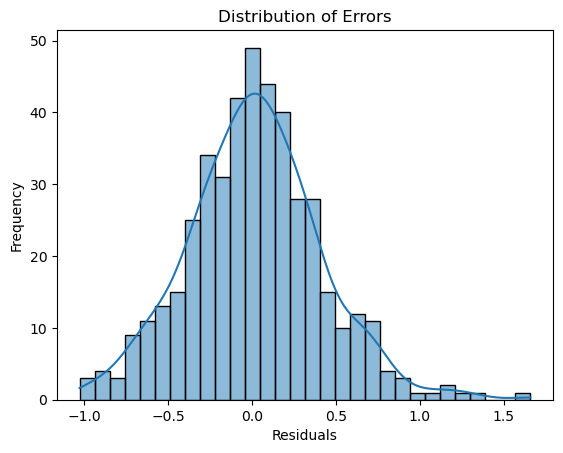

XGBRegressor - 
CV RMSE: 0.3325, 
Test MAE: 0.2328, 
Test MSE: 0.1003, 
Test RMSE: 0.3168, 
R^2 Score: 0.8958


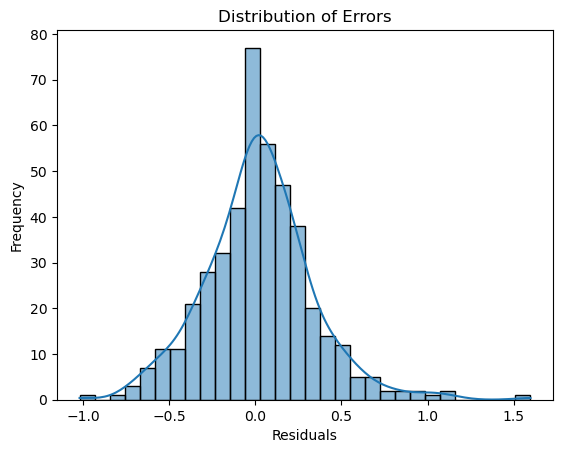

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2083
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 35
[LightGBM] [Info] Start training from score 0.005855
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

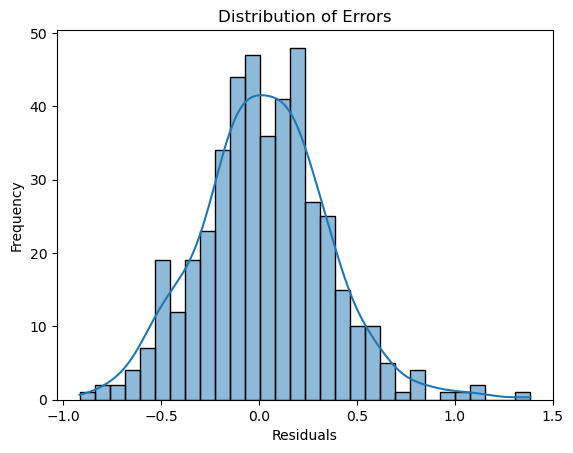

Ridge Regression - 
CV RMSE: 0.4305, 
Test MAE: 0.3227, 
Test MSE: 0.1900, 
Test RMSE: 0.4358, 
R^2 Score: 0.8026


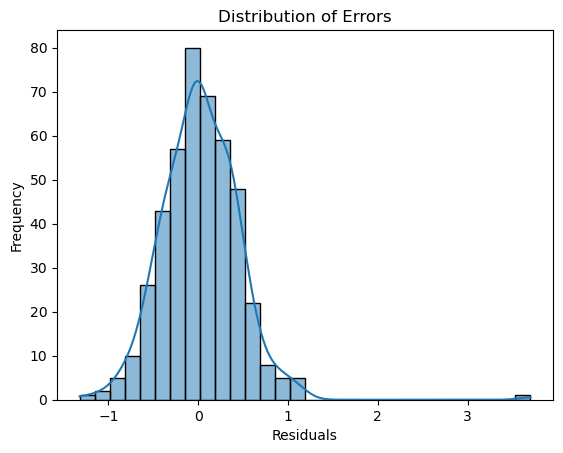

Lasso Regression - 
CV RMSE: 0.9998, 
Test MAE: 0.8332, 
Test MSE: 0.9634, 
Test RMSE: 0.9815, 
R^2 Score: -0.0009


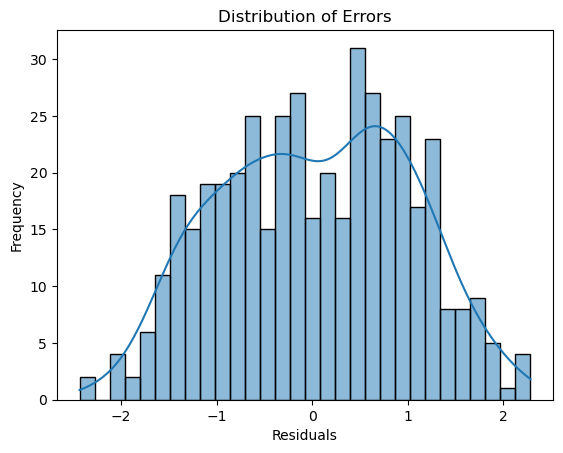

CatBoostRegressor - 
CV RMSE: 0.3427, 
Test MAE: 0.2549, 
Test MSE: 0.1062, 
Test RMSE: 0.3258, 
R^2 Score: 0.8897


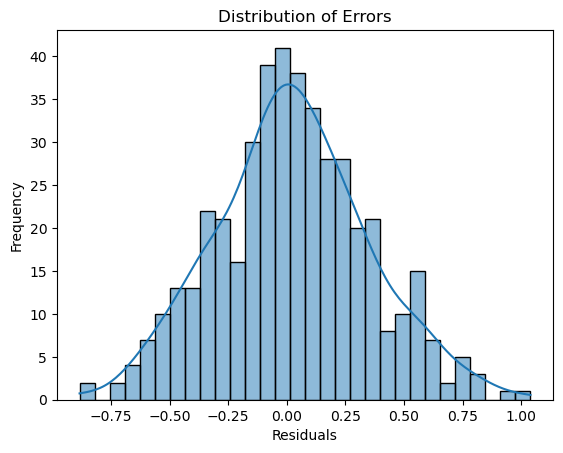

In [21]:
from sklearn.model_selection import cross_val_score


cv_results = {}
for model_name, model in baseline_models.items():

    model.fit(X_train_standed, y_train_standed)
    y_pred = model.predict(X_test_standed)
    residuals = (y_pred - y_test_standed)
    # Cross-validation
    cv_scores = cross_val_score(model, X_original, y_original, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores).mean()  # RMSE from cross-validation
    
    # Test-set evaluation using our custom evaluation function
    test_metrics = evaluate_model(model, X_train_standed, X_test_standed, y_train_standed, y_test_standed)
    
    cv_results[model_name] = {
        "Cross-Validation RMSE": cv_rmse,
        "Test Set Evaluation": test_metrics
    }
    

    print(f"{model_name} - \nCV RMSE: {cv_rmse:.4f}, \nTest MAE: {test_metrics['MAE']:.4f}, "
          f"\nTest MSE: {test_metrics['MSE']:.4f}, \nTest RMSE: {test_metrics['RMSE']:.4f}, "
          f"\nR^2 Score: {test_metrics['R^2 Score']:.4f}")
    
    sns.histplot(residuals, bins=30, edgecolor='black', kde=True)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Distribution of Errors')
    plt.show()    

    print("=============================================================")

In [52]:
from keras.layers import Dense, Input, Dropout, Normalization, BatchNormalization
from keras.models import Model, Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam


model = Sequential([
    Input(shape=[X_train_standed.shape[1]]),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(96, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'), 
    Dense(1, activation='linear'), 
])
optimizer = Adam(learning_rate=0.01)
model.compile(
    optimizer=optimizer, loss='mse', metrics=['mae', 'mse']
)

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Model training
model.fit(
    X_train_standed, y_train_standed,
    validation_data=(X_test_standed, y_test_standed),
    batch_size=100,
    epochs=200,
    shuffle = True,
    callbacks=[early_stopping]
)

Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6643 - mae: 0.6292 - mse: 0.6643 - val_loss: 0.3099 - val_mae: 0.4374 - val_mse: 0.3099
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2800 - mae: 0.4131 - mse: 0.2800 - val_loss: 0.2077 - val_mae: 0.3516 - val_mse: 0.2077
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2270 - mae: 0.3741 - mse: 0.2270 - val_loss: 0.2065 - val_mae: 0.3503 - val_mse: 0.2065
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2051 - mae: 0.3541 - mse: 0.2051 - val_loss: 0.2349 - val_mae: 0.3737 - val_mse: 0.2349
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1832 - mae: 0.3353 - mse: 0.1832 - val_loss: 0.2581 - val_mae: 0.3987 - val_mse: 0.2581
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1814 - mae: 0.3289 - mse: 0.1814 - val_loss: 0.2231 - val_mae: 0.3639 - val_mse: 0.2231
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1709 - mae: 0.3259 - mse: 0.1709 - val_loss:

In [53]:
y_pred = model.predict(X_test_standed)
r2_scoree = r2_score(y_test_standed, y_pred)
print(r2_scoree)
residuals = y_pred - y_test_standed


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
0.8613499796686931
